# Elite Dangerous Stellar Classification 
### February, 2021

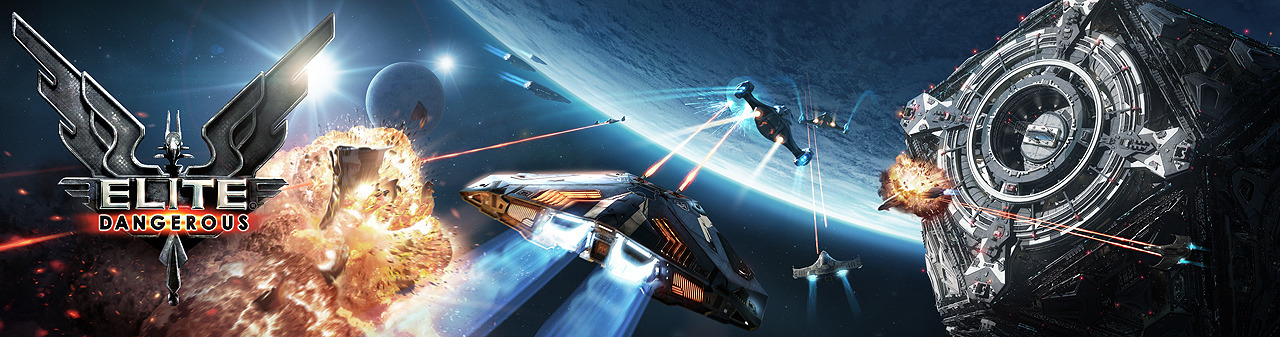

This dataset is all discovered stars in the Milky Way Galaxy as observed in year 3307 in the space simulator Elite Dangerous. It contains both real star data for approximately 140,000 stars which humans can directly measure and observe, and precedurally generated stars for the rest of the galaxy. These generated stars are approximated using known measures of stars of the same type and having an idea of the types of stars likely to be found at various locations throughout the galaxy.

**Hypothesis**: A star's type can be inferred (predicted) by evaluating a few key properties of the star. Various machine learning approaches will be considered, many will not meet the high standards required by the Service and will wash out to become plumbers.

I will take a look at the following variables:
* **Name**: The literal name of the star. Some stars have specific names, such as Sol, Vega, or Sirius, others are less familiar stars and are typically named for what region or sector of the Milky Way Galaxy they reside in. Only here for reference, not included in the analysis
* **Type**: The type of the star, or class of star. This will be the target/label for the project.
* **Solar Masses**: The star's mass in proportion to Sol.
* **Solar Radius**: The distance from the center of the star to the surface, in proportion to Sol.
* **Surface Temperature (K/deg Celsius)**: The temperature at the surface of the star. This can be quite large, or can be 0 in the case of a Black Hole.
* **Absolute Magnitude**: The "visual" magnitude of the star if it were located 10 parsecs from Sol. Basically, stars appear brighter at different distances than they may actually be, this metric attempts to standardize their brightness. Note that "visual" also includes some light frequencies not visible to the human eye.
* **Luminosity**: Stars have various luminosity ratings which help describe the star's intensity other than just using surface temperature. More information can be found at https://astronomy.swin.edu.au/cosmos/M/Morgan-Keenan+Luminosity+Class.

Note: I purposefully chose an extra large dataset for a personal computer so that I could run into the problems with cleaning and processing inherently large data and learn from it breaking and finding workarounds. Due to the dataset being procedurally generated, in many ways it's too clean to represent a real world problem, but it's served its purpose for learning.

**Results**

* The results were roughly as expected. Decision Tree-based models achieved a very high accuracy in prediction.
* The sheer number of classes, however, and the under/oversampling that would be required to balance them was an issue. If I were to go over this project again, I would try to detect "Main Sequence" stars, of types K, G, B, F, O, A, and M and let everything else fall into "Other", which would reduce the classes to 8. Maybe throw in Black Holes because those are just so unique and interesting.
* The fact that the star data was likely procedurally generated by the game developer really stuck out more than I was hoping it would. At least that is my assumption based on how well the models generated did on both the training and test data. That being said, if star properties typically fall closely within defined parameters, perhaps it's more realistic than I think.

### Import required Data Science libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

sns.set()
pd.options.display.max_columns=500
warnings.filterwarnings("ignore")

**For simplicity of reading, I've already collected and cleaned the data in a separate notebook and saved it to a pickle file, which I load here to get the dataset back into memory cleanly and quickly.**

In [2]:
#galaxy = pd.read_pickle('galaxy_s.pickle') # First I'll use the sample to get the code working, then switch to the full dataset

In [3]:
galaxy = pd.read_pickle('galaxy.pickle')

### See how many rows (stars) are in the file

In [4]:
galaxy.shape

(65261913, 7)

"A few"

### Let's take a quick look at the data to see if it looks to be properly imported

In [5]:
galaxy.sample(20)

,Name,Type,Solar Masses,Solar Radius,Surface Temperature,Absolute Magnitude,Luminosity
8567946,Hegua NZ-T b31-2 B,L (Brown dwarf) Star,0.085938,0.207672,1360,14.52790,2
2727823,Outorns SX-L d7-6,A (Blue-White) Star,1.691410,1.395110,7757,2.82733,2
5694433,Skueqiae AM-Z a68-0,Y (Brown dwarf) Star,0.019531,0.089966,510,21.13330,2
2448602,Outotch VW-Z c14-0,K (Yellow-Orange) Star,0.542969,0.729309,3920,7.20097,2
4170516,Schiqeae KI-A d14-1 A,G (White-Yellow) Star,1.128910,1.153500,5799,4.50409,2
1810966,Byeia Eurk IG-W d2-33,F (White) Star,1.730470,1.519530,7449,2.81778,2
4542325,Eidaik UC-N c22-6 A,G (White-Yellow) Star,0.785156,0.862671,5425,5.42474,2
10394135,Spasao TZ-C c1-0 C,M (Red dwarf) Star,0.324219,0.471436,2648,9.85272,2
1525329,Prua Phoe RK-C d14-1189 B,G (White-Yellow) Star,1.042970,0.939240,5683,5.03824,2
10775126,Traikaae WL-O b38-0 A,L (Brown dwarf) Star,0.207031,0.365631,1948,11.73840,2


Yup.

### How correlated are my independent variables with one another?

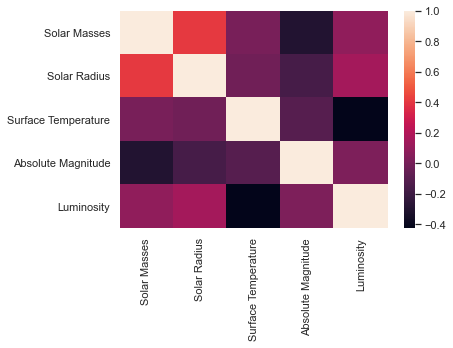

In [6]:
sns.heatmap(galaxy.corr(), cmap='rocket');

It looks like I should possibly consider using either Solar Masses or Solar Radius, but the correlation isn't TOO strong so for now I'll keep them both.

### How much memory is the dataset consuming?

In [7]:
galaxy.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65261913 entries, 0 to 27509
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Name                 object 
 1   Type                 object 
 2   Solar Masses         float64
 3   Solar Radius         float64
 4   Surface Temperature  int64  
 5   Absolute Magnitude   float64
 6   Luminosity           int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 12.3 GB


12 gigs. Just enough for the algo to work on an Apple II.

### Quick look at summary statistics to see if there are any obvious problems in the dataset or strange values

In [8]:
galaxy.describe().apply(lambda s: s.apply('{0:.5f}'.format)) # this apply was required because it was putting scientific notation everywhere

,Solar Masses,Solar Radius,Surface Temperature,Absolute Magnitude,Luminosity
count,65261913.00000,65261913.00000,65261913.00000,65261913.00000,65261913.00000
mean,0.69833,0.76238,165821.10834,8.73670,1.85373
std,2.33181,5.27546,1478469.76403,4.32496,0.47703
min,0.00000,0.00000,0.00000,-22.68330,0.00000
25%,0.23047,0.37085,2267.00000,5.69669,2.00000
50%,0.41797,0.55268,3314.00000,8.46825,2.00000
75%,0.78125,0.83789,5068.00000,10.92310,2.00000
max,198.09800,1418.29000,985067520.00000,36.11780,7.00000


Note that many of the minimums are 0, which looks like a problem at first, but this dataset also includes Black Holes so zeroes make sense in that case because data can't be collected beyond an Event Horizon. I am no astrophysicist, so please consult one for further information.

## There's No Place Like Home

Here you can get a good foundation point for understanding the data elements.

In [9]:
galaxy[galaxy['Name'].isin(['Sol', 'Alpha Centauri', 'Proxima Centauri', 'Sirius', 'Vega', 'Betelgeuse'])]

,Name,Type,Solar Masses,Solar Radius,Surface Temperature,Absolute Magnitude,Luminosity
125950,Sirius,A (Blue-White) Star,2.531250,1.708930,10373,1.502870,2
125955,Vega,A (Blue-White) Star,3.191410,2.082900,11977,0.705475,2
65363,Sol,G (White-Yellow) Star,1.000000,0.998794,5778,4.829990,2
224101,Alpha Centauri,G (White-Yellow) Star,1.175780,1.101270,6557,4.357270,2
465,Betelgeuse,M (Red super giant) Star,0.257813,639.600000,2445,-5.468780,6
1423520,Proxima Centauri,M (Red dwarf) Star,0.121094,0.265091,1540,15.461900,2


## How many stars are there of each type in the full dataset?

Note that I could further condense down these labels to have fewer categories, but I want to see how well this does out of the box with this many labels and with an imbalanced sample.

Maybe later I'll do a "Main Sequence Stars (KGBFOAM)" vs. "Black Holes" vs. "Dwarves" vs. "Wolves" battle royale. Or I'll classify them by their favorite colors, but that will require a survey. And if stars are anything like fighter pilots, they won't fill out the survey. Just kidding.

Kinda.

In [10]:
galaxy['Type'].value_counts()

M (Red dwarf) Star                   23903360
K (Yellow-Orange) Star               12558788
L (Brown dwarf) Star                  6732023
F (White) Star                        5399323
G (White-Yellow) Star                 4303507
T (Brown dwarf) Star                  3144099
A (Blue-White) Star                   2633059
Neutron Star                          1922031
Y (Brown dwarf) Star                  1661897
T Tauri Star                          1523811
B (Blue-White) Star                    750691
Black Hole                             178906
M (Red giant) Star                     107371
White Dwarf (DC) Star                   86809
O (Blue-White) Star                     79326
Herbig Ae/Be Star                       58741
White Dwarf (DA) Star                   56426
K (Yellow-Orange giant) Star            28884
White Dwarf (DAB) Star                  24819
S-type Star                             13218
MS-type Star                            12599
Wolf-Rayet O Star                 

So this data set is very class-imbalanced. Typically you would want to oversample under-represented classes and downsample over-represented classes, but I wanted to observe the effects of not doing so in the models I build and see how many classes they were able to predict without balancing. I will stratify the test/train split however.

# Establish a Feature Universe

These are what we will use to predict Star Type. Note that these have been selected by "subject matter expertise", but it's also handy to use sklearn's mutual_info_regression() function when there are a lot of features and you're not sure which ones affect the labels the most. Also note that that function can take 27 million years to complete when the data is large and you have a shipload of labels.

In [11]:
galaxy.dtypes

Name                    object
Type                    object
Solar Masses           float64
Solar Radius           float64
Surface Temperature      int64
Absolute Magnitude     float64
Luminosity               int64
dtype: object

Get a quick printout of the columns so I can lazy copy/paste into the features and labels sets.

In [12]:
galaxy.columns

Index(['Name', 'Type', 'Solar Masses', 'Solar Radius', 'Surface Temperature',
       'Absolute Magnitude', 'Luminosity'],
      dtype='object')

In [13]:
features = ['Solar Masses', 'Solar Radius',
       'Surface Temperature', 'Absolute Magnitude', 'Luminosity']
labels = ['Type']

# Creating the Train/Test split

This ensures that the model's performance can be measured against data that it did not use to train, therefore potentially exposing bias (overfitting). For a Neural Network, the training data will be further split into training and validation data, then further compared against the original test data.

In [14]:
from sklearn.model_selection import train_test_split

# 70% train/validation, 30% test split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(galaxy[features], galaxy[labels], test_size=0.3, stratify=galaxy[labels], random_state=81)

Quick length check of the new data splits:

In [15]:
for sample in [Xtrain, Xtest, Ytrain, Ytest]:
    print(len(sample))

45683339
19578574
45683339
19578574


# Decision Tree Model

Given the sheer amount of observations I have in the dataset (a mere 65 million), I expect the Decision Tree model to have quite high accuracy on the test data.

Decision Trees can be prone to overfitting if left to create as many branches as they want, however, so experimenting with tree 'pruning' would be good for further analysis and coming to a more generalized model. In this case, however, the tree performed just as well on the test data as it did the training data, so perhaps no need to prune just yet. Unless you just like a tidy tree.

In [16]:
from sklearn import tree

In [17]:
%%time

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(Xtrain, Ytrain)

Wall time: 12min 18s


DecisionTreeClassifier()

In [18]:
print('accuracy on training data: ', DT_model.score(Xtrain, Ytrain))
print('accuracy on test data: ', DT_model.score(Xtest, Ytest))

accuracy on training data:  0.9992318862682082
accuracy on test data:  0.9924046562328799


In [32]:
DT_Preds = pd.Series(DT_model.predict(Xtest))

In [34]:
actuals = pd.Series(Ytest['Type']).value_counts()
predictions = pd.Series(DT_Preds).value_counts()

In [36]:
pd.concat([actuals, predictions, pd.Series(data=actuals-predictions, name='Delta')], axis=1)

,Type,Prediction,Delta
M (Red dwarf) Star,7171008,7172996,-1988
K (Yellow-Orange) Star,3767636,3766858,778
L (Brown dwarf) Star,2019607,2019607,0
F (White) Star,1619797,1619224,573
G (White-Yellow) Star,1291052,1290501,551
T (Brown dwarf) Star,943230,943233,-3
A (Blue-White) Star,789918,789617,301
Neutron Star,576609,576609,0
Y (Brown dwarf) Star,498569,498567,2
T Tauri Star,457143,457554,-411


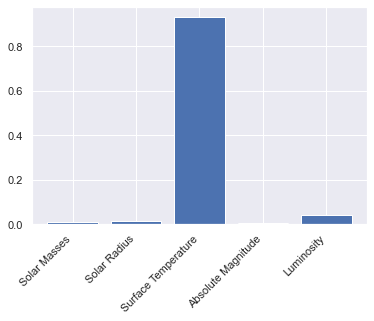

In [37]:
plt.bar(x=features, height=DT_model.feature_importances_)
plt.xticks(rotation=45, ha='right')
plt.show();

Depth of the tree:

In [49]:
DT_model.get_depth()

120

Whoa. Deep tree.

**Summary:** In the Decision Tree, it looks like it's relying almost entirely on Surface Temperature to make the determination despite it having 120 levels. It's doing a good job of predicting the test data, though. And making me most happy is the fact that it's predicting just as many classes as are in the data.

In [58]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(Ytest, DT_Preds)
rec = recall_score(Ytest, DT_Preds, average='weighted')
prec = precision_score(Ytest, DT_Preds, average='weighted')
f1 = f1_score(Ytest, DT_Preds, average='weighted')

In [60]:
pd.DataFrame(data=[[acc, rec, prec, f1]], columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=["Score"])

,Accuracy,Precision,Recall,F1
Score,0.992405,0.992405,0.992324,0.992346


# Random Forest Model

A random tree forest is an ensemble approach. Basically it creates a lot of optimized sub-trees and combines them into one super Frankentree at the end. This would really irritate a botanist like Mark Watney. Let's see how it does:

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
%%time

RF_model = RandomForestClassifier(n_estimators=50, max_depth=5)
RF_model.fit(Xtrain, Ytrain)

Wall time: 53min 32s


RandomForestClassifier(max_depth=5, n_estimators=50)

In [41]:
print('accuracy on training data: ', RF_model.score(Xtrain, Ytrain))
print('accuracy on test data: ', RF_model.score(Xtest, Ytest))

accuracy on training data:  0.9814215856682454
accuracy on test data:  0.9814439499015608


Again, the model first appears to be potentially overfit, but it's performing just as well on test data. Probably more of an effect of how they generated the star data for the game and the sheer amount of observations I have revealing information about how it was generated.

In [42]:
RF_Preds = pd.Series(RF_model.predict(Xtest))

In [43]:
actuals = pd.Series(Ytest['Type']).value_counts()
predictions = pd.Series(RF_Preds).value_counts()

In [44]:
pd.concat([actuals, predictions, pd.Series(data=actuals-predictions, name='Delta')], axis=1)

,Type,0,Delta
M (Red dwarf) Star,7171008,7294548.0,-123540.0
K (Yellow-Orange) Star,3767636,3825838.0,-58202.0
L (Brown dwarf) Star,2019607,2022773.0,-3166.0
F (White) Star,1619797,1630422.0,-10625.0
G (White-Yellow) Star,1291052,1304019.0,-12967.0
T (Brown dwarf) Star,943230,1010399.0,-67169.0
A (Blue-White) Star,789918,801008.0,-11090.0
Neutron Star,576609,576689.0,-80.0
Y (Brown dwarf) Star,498569,498582.0,-13.0
T Tauri Star,457143,174346.0,282797.0


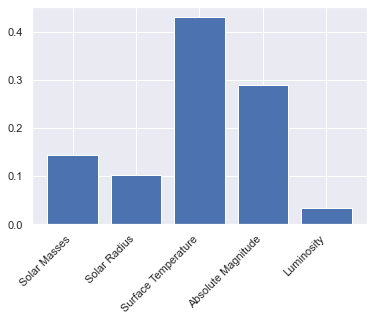

In [45]:
plt.bar(x=features, height=RF_model.feature_importances_)
plt.xticks(rotation=45, ha='right')
plt.show();

In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(Ytest, RF_Preds)
rec = recall_score(Ytest, RF_Preds, average='weighted')
prec = precision_score(Ytest, RF_Preds, average='weighted')
f1 = f1_score(Ytest, RF_Preds, average='weighted')

In [62]:
pd.DataFrame(data=[[acc, rec, prec, f1]], columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=["Score"])

,Accuracy,Precision,Recall,F1
Score,0.981444,0.981444,0.979306,0.976926


The Random Forest model seems to take a more balanced approach to prediction of Star Type than Decision Tree. This is more what I expected in regard to usage of independent variables, but...

**Summary:** The Random Forest produced similar accuracy to the basic Decision Tree, although it predicted far too few classes and took quite a bit longer to fit.